<h2>EDA - Análisis exploratorio de los datos sobre siniestros viales</h2>

<h3>Contexto</h3>

<p style="font-size:16px;">En Argentina, cada año mueren cerca de 4.000 personas en siniestros viales. Aunque muchas jurisdicciones han logrado disminuir la cantidad de accidentes de tránsito, esta sigue siendo la principal causa de muertes violentas en el país. Los informes del Sistema Nacional de Información Criminal (SNIC), del Ministerio de Seguridad de la Nación, revelan que entre 2018 y 2022 se registraron 19.630 muertes en siniestros viales en todo el país. Estas cifras equivalen a 11 personas por día que resultaron víctimas fatales por accidentes de tránsito.</p>

<p style="font-size:16px;">Solo en 2022, se contabilizaron 3.828 muertes fatales en este tipo de hechos. Los expertos en la materia indican que en Argentina es dos o tres veces más alta la probabilidad de que una persona muera en un siniestro vial que en un hecho de inseguridad delictiva. </p>

<h3>Objetivos</h3>

<p style="font-size:16px;">El objetivo es realizar un EDA (Análisis exploratorio de los datos) para poder encontrar relaciones en los datos que nos permitan realizar un análisis profundo y encontrar posibles causas y conclusiones a la hora de abordar la problemática de los siniestros viales en Argentina.</p>

<p style="font-size:16px;">En este EDA abordaremos:</p>

<ul>
  <li>Posibles valores nulos</li>
  <li>Posibles registros duplicados</li>
  <li>Posibles valores outliers</li>
  <li>Gráficos representativos con su correspondiente análisis</li>
  <li>Conclusiones</li>
</ul>

<p style="font-size:17px;"><u>Importo las librerías a utilizar</u> </p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<p style="font-size:17px;"><u>Lectura de los datos disponibles</u></p>
<p style="font-size:15px;">Leo el dataset y lo transformo a dataframes con Pandas</p>

In [3]:

ruta = 'Datasets/homicidios.xlsx'
hechos = pd.read_excel(ruta, sheet_name='HECHOS')
victimas = pd.read_excel(ruta, sheet_name='VICTIMAS')

In [3]:

hechos.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


<p style="font-size:15px;">Observo los datos y columnas del dataset hechos</p>

In [3]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

<p style="font-size:15px;">Observo los datos y columnas del dataset víctimas</p>

In [4]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [5]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


<p style="font-size:18px;"><u>Verificación de la existencia de valores nulos</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset hechos</p>

In [5]:
hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

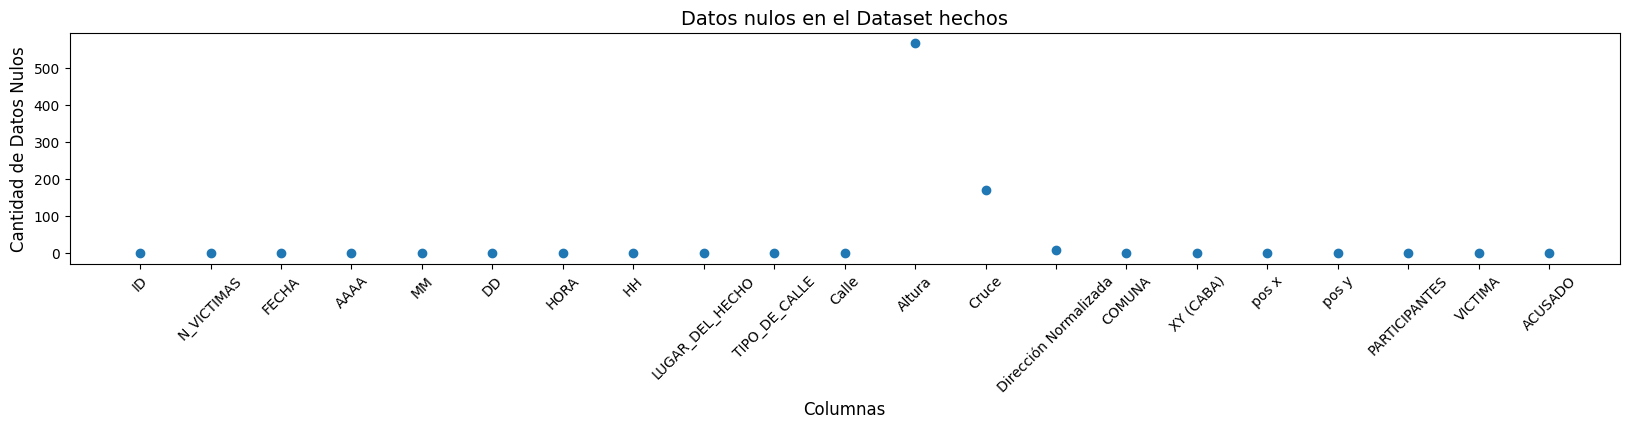

In [18]:
nulos_hechos = hechos.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(nulos_hechos.index, nulos_hechos.values)
plt.title('Datos nulos en el Dataset hechos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:16px;">Los datos nulos corresponden a la altura de la calle y el cruce. Se decidió no imputarlos porque no se considera que influyan en el análisis. </p>

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset víctimas</p>

In [8]:
victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

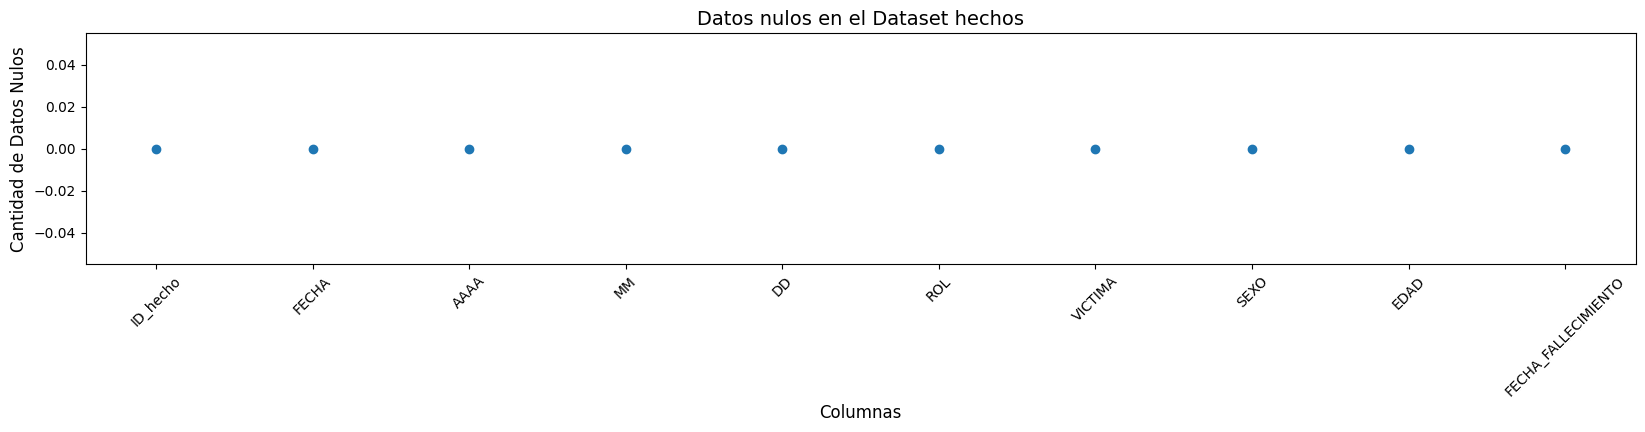

In [19]:
victimas_hechos = victimas.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(victimas_hechos.index, victimas_hechos.values)
plt.title('Datos nulos en el Dataset hechos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:18px;"><u>Valores outliers</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores outliers mediante el Método del Rango Intercuartil (IQR)</p>
<p style="font-size:15px;">El método IQR es una técnica común para detectar outliers. Los valores que caen por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR son considerados outliers.</p>

In [6]:

def detectar_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers_hechos = detectar_outliers_iqr(hechos)
print("Outliers en 'hechos':")
for column, outliers in outliers_hechos.items():
    print(f"{column}: {len(outliers)} outliers")


outliers_victimas = detectar_outliers_iqr(victimas)
print("\nOutliers en 'victimas':")
for column, outliers in outliers_victimas.items():
    print(f"{column}: {len(outliers)} outliers")


Outliers en 'hechos':
N_VICTIMAS: 20 outliers
AAAA: 0 outliers
MM: 0 outliers
DD: 0 outliers
Altura: 7 outliers
COMUNA: 0 outliers

Outliers en 'victimas':
AAAA: 0 outliers
MM: 0 outliers
DD: 0 outliers


<p style="font-size:15px;">Realizo el gráfico para mostrar los outliers de el número de víctimas</p>

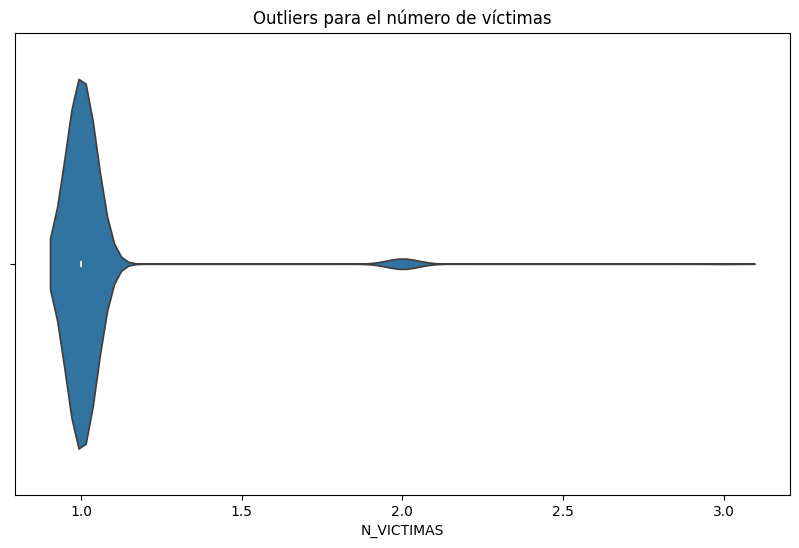

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=hechos['N_VICTIMAS'])
plt.title('Outliers para el número de víctimas')
plt.xlabel('N_VICTIMAS')
plt.show()

<p style="font-size:15px;">Calculo la media de la columna N_VICTIMAS para ver cómo influyen los outliers</p>

In [27]:
media_n_victimas = hechos['N_VICTIMAS'].mean()
media_n_victimas

1.0301724137931034

<p style="font-size:15px;">Realizo el gráfico para mostrar los la media del número de víctimas</p>

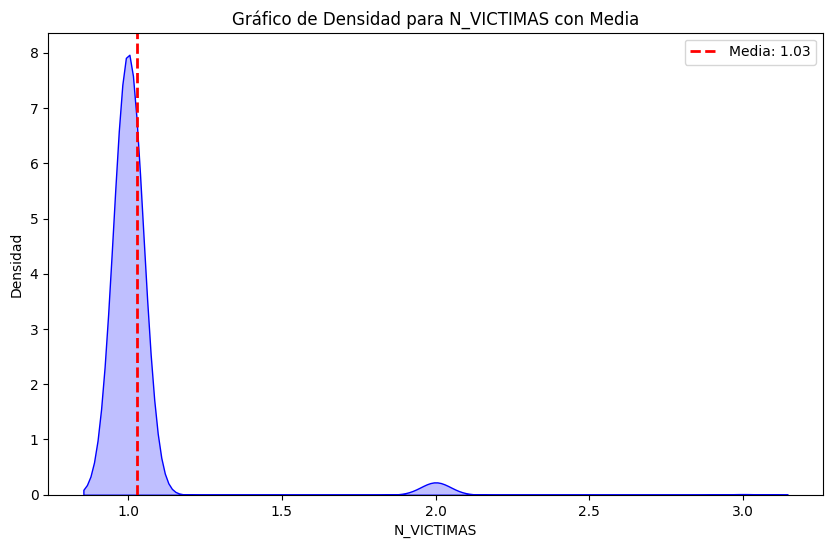

In [35]:
media_n_victimas = hechos['N_VICTIMAS'].mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(hechos['N_VICTIMAS'], fill=True, color='blue')
plt.axvline(media_n_victimas, color='red', linestyle='--', linewidth=2, label=f'Media: {media_n_victimas:.2f}')
plt.title('Gráfico de Densidad para N_VICTIMAS con Media')
plt.xlabel('N_VICTIMAS')
plt.ylabel('Densidad')
plt.legend()
plt.show()

<p style="font-size:16px;">Al analizar los valores outliers y contrastarlo con el dataset, se puede observar que los valores que se presentan como outliers en N_VICTIMAS simplemente se refiere a valores que van por fuera de la media que es 1. Esto es asi, debido a que por accidente hay más de una victima en algunos casos, lo que se ve reflejado como outliers.</p>

<p style="font-size:16px;">La otra columna que presenta valores outliers es la de Altura, pero no tiene sentido realizar un análisis de la misma ya que los valores no están representados por un promedio, sino que representan un número de calle </p>

<p style="font-size:18px;"><u>Verificación de la existencia de registros duplicados </u> </p>

<p style="font-size:15px;">Busco registros duplicados en los datasets hechos y víctimas</p>

In [30]:
duplicados_hechos = hechos[hechos.duplicated()]
duplicados_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [31]:
duplicados_victimas = victimas[victimas.duplicated()]
duplicados_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


<p style="font-size:15px;">Como podemos observar, no existen valores duplicados en ninguno de los dos datasets.</p>

<p style="font-size:18px;"><u>Matriz de correlación</u></p>

<p style="font-size:15px;"> Selecciono las columnas N_Victimas, AAAA (año) y Comuna, para establecer una matriz de correlación.</p>


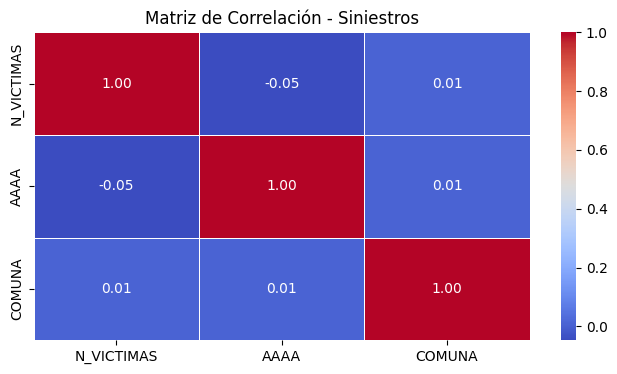

In [32]:
columnas_seleccionadas = ['N_VICTIMAS', 'AAAA', 'COMUNA']
hechos_subset = hechos[columnas_seleccionadas]

correlation_matrix = hechos_subset.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación - Siniestros')
plt.show()

<p style="font-size:16px;">Observando la matriz de correlación podemos ver cómo el número de víctimas, el año y la comuna se vinculan 
estrechamente. </p>

<p style="font-size:18px;"><u>Número de víctimas por año</u></p>

<p style="font-size:15px;"> Agrupo los datos por el año y sumo el número de víctimas para cada año.</p>

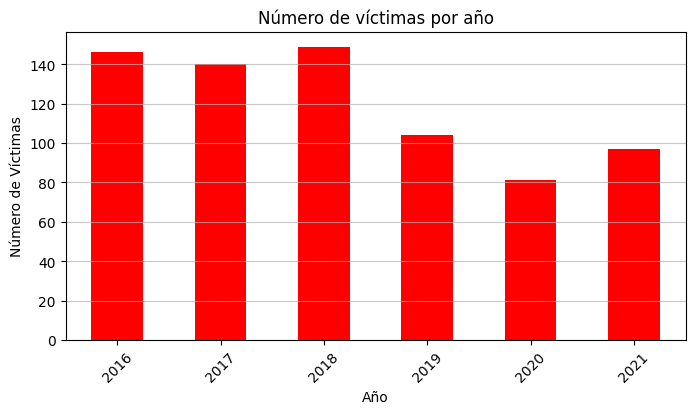

In [33]:
victimas_por_anio = hechos.groupby('AAAA')['N_VICTIMAS'].sum()

plt.figure(figsize=(8, 4))
victimas_por_anio.plot(kind='bar', color='red')
plt.title('Número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)  
plt.grid(axis='y', alpha=0.7)  
plt.show()

<p style="font-size:16px;">Al analizar el gráfico podemos observar que el año 2018 fue el año con mayor cantidad de víctimas de fallecimiento por siniestros viales, seguido del año 2016. </p>

<p style="font-size:16px;">Otro detalle que podemos observar es que el año 2020 fue el año con menos cantidad de accidentes de tránsito, seguido del año 2021. Si observamos cuidadosamente, este año fue el de la pandemia COVID-19, entonces es muy probable que, al haber habido un confinamiento y poca circulación en las calles, disminuyera la cantidad de accidentes de tránsito. </p>

<p style="font-size:18px;"><u>Cantidad de victimas por sexo</u></p>

<p style="font-size:15px;"> Analizo la cantidad de víctimas de accidentes de tránsito por sexo.</p>

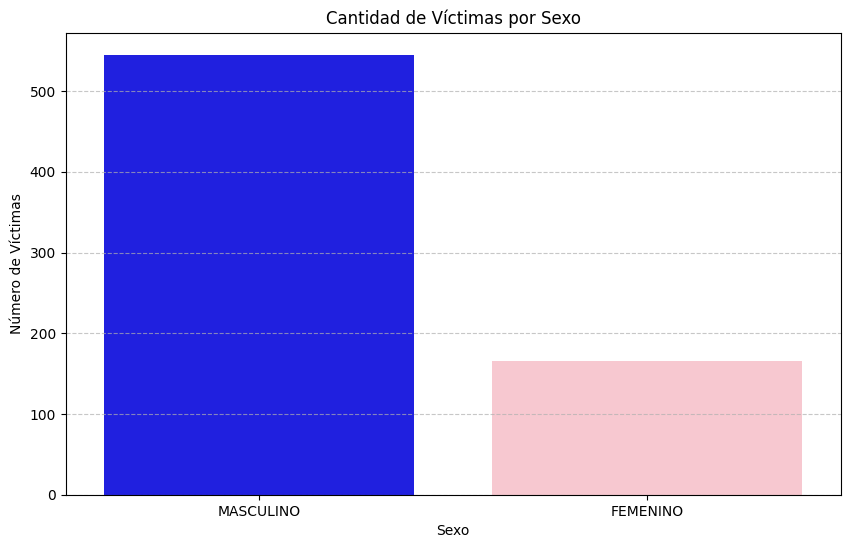

In [13]:
victimas = victimas[victimas['SEXO'] != 'SD']

combined_df = pd.merge(hechos, victimas, left_on='ID', right_on='ID_hecho')

victimas_por_sexo = combined_df['SEXO'].value_counts().reset_index()
victimas_por_sexo.columns = ['SEXO', 'N_VICTIMAS']

plt.figure(figsize=(10, 6))
sns.barplot(data=victimas_por_sexo, x='SEXO', y='N_VICTIMAS', color='blue')  
sns.barplot(data=victimas_por_sexo[victimas_por_sexo['SEXO'] == 'FEMENINO'], x='SEXO', y='N_VICTIMAS', color='pink') 
plt.title('Cantidad de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<p style="font-size:16px;">Al analizar el gráfico podemos observar la gran diferencia que existe en cuanto a las víctimas por sexo en los siniestros viales, siendo ampliamente mayor la cantidad de víctimas de sexo masculino que femenino. </p>

<p style="font-size:16px;">Este no es un dato menor ya que tenemos que tener en cuenta que según el Ministerio de Transporte de la Argentina, para el año marzo 2023, el porcentaje de habitantes con licencia para conducir es del 69% para los hombres y del 31% para las mujeres. Conociendo este dato, claramente hay una diferencia en cuanto a la cantidad de hombres que manejan vehículos con respecto a las mujeres. Por lo tanto, sabiendo que las motos son el típo de vehículo que más accidentes y victimas produce, y la gran mayoría de los que conducen motos son hombres, acá vemos cómo se refleja en los datos en cuanto a la cantidad de víctimas por sexo.</p>

<p style="font-size:16px;">Por otro lado, también es oportuno agregar que según el Ministerio de Transporte, las mujeres utilizan más el cinturón de seguridad (62%) que los hombres, lo que hace que sean menos suceptibles a sufrir muerte por accidente de tránsito.</p>

<p style="font-size:15px;">Calculo los porcentajes de víctimas por sexo.</p>

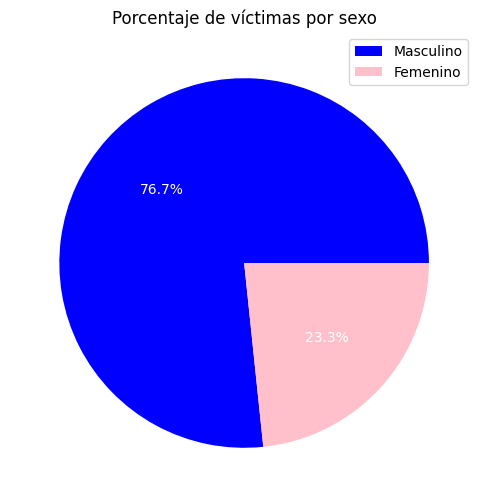

In [14]:
total_victimas = victimas_por_sexo['N_VICTIMAS'].sum()
porcentajes = victimas_por_sexo['N_VICTIMAS'] / total_victimas * 100

plt.figure(figsize=(6, 6))
plt.pie(porcentajes, labels=victimas_por_sexo['SEXO'], autopct='%1.1f%%', colors=['blue', 'pink'], textprops={'color': 'white'})
plt.legend(loc='upper right', labels=['Masculino', 'Femenino'])
plt.title('Porcentaje de víctimas por sexo')
plt.show()

<p style="font-size:16px;">En este gráfico de torta podemos apreciar mejor la enorme diferencia de porcentajes de víctimas de sexo masculino por sobre el femenino </p>

<p style="font-size:18px;"><u>Cantidad de víctimas por edad</u></p>

<p style="font-size:15px;">Muestro la cantidad de víctimas por rango etario </p>

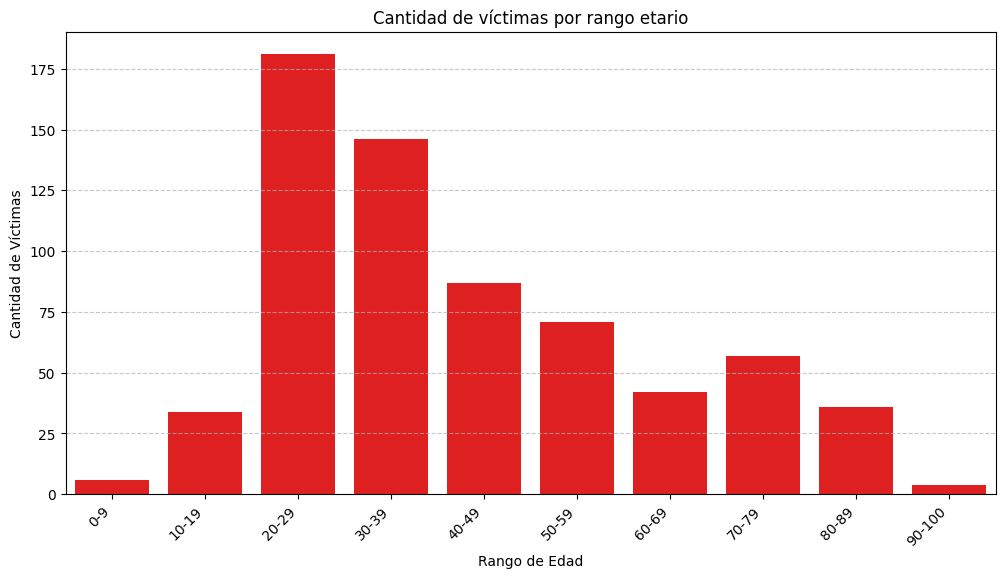

In [11]:
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')

victimas = victimas.dropna(subset=['EDAD'])

victimas_enteros = victimas[victimas['EDAD'].astype(int) == victimas['EDAD']]

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

victimas_enteros['Rango de Edad'] = pd.cut(victimas_enteros['EDAD'], bins=bins, labels=labels, right=False)

victimas_por_rango_edad = victimas_enteros['Rango de Edad'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=victimas_por_rango_edad.index, y=victimas_por_rango_edad.values, color='red')
plt.title('Cantidad de víctimas por rango etario')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">En este gráfico podemos observar que el rango etario con mayor cantidad de víctimas es el que va de 20 a 29 años, seguido del rango que va de 30 a 39 años. Podemos ver que las víctimas de los accidentes son jóvenes en su mayoría. </p>

<p style="font-size:16px;">¿Cómo se explica que la franja etaria que va desde los 20 a los 39 años sea la más preponderante en cuanto a víctimas de siniestros viales? Bueno, podemos analizar que esta es la franja etaria donde más productividad tiene una persona y es suceptible de percibir mayor cantidad de ingreso, y, por ende, tiene la disponibilidad económica suficiente para hacerse de un vehículo.</p>

<p style="font-size:16px;">Por otro lado, tenemos que pensar que el segundo tipo de víctima de siniestros viales detrás de las motos son los peatones. Si analizamos cuidadosamente, es más probable que una persona que está en la franja etárea de los 20 a los 39 años se movilice recorriendo las calles por diferentes causas mucho más que lo que lo hace un niño o una persona mayor, por lo tanto aumenta la probabilidad de sufrir accidentes.</p>

<p style="font-size:18px;"><u>Tipo de vehículo víctima de siniestros viales</u></p>

<p style="font-size:15px;">Muestro los tipos de vehículos víctimas de siniestros viales</p>

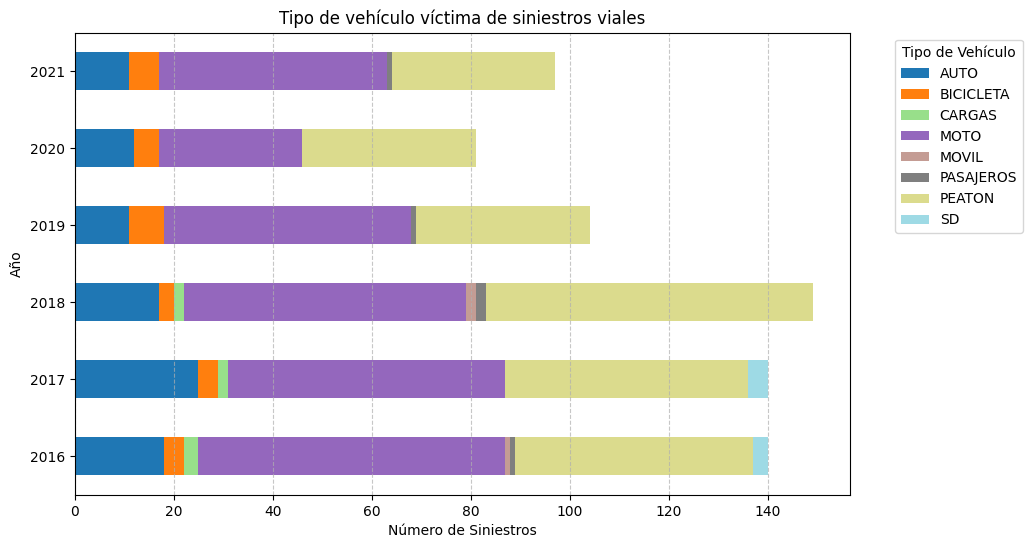

In [15]:

vehiculos_por_anio = victimas.groupby(['AAAA', 'VICTIMA']).size().unstack().fillna(0)


vehiculos_por_anio.plot(kind='barh', stacked=True, figsize=(10 , 6), colormap='tab20')
plt.title('Tipo de vehículo víctima de siniestros viales')
plt.xlabel('Número de Siniestros')
plt.ylabel('Año')
plt.legend(title='Tipo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Como podemos observar en el gráfico, las motos y los peatones son los dos elementos que más accidentes viales han tenido a lo largo de los años, seguidos de los autos. </p>

<p style="font-size:16px;">Si observamos con detenimiento este gráfico, vemos que el vehículo que más víctimas fatales produce es la moto. Si analizamos los datos del Ministerio de Transporte, vemos que el 70% de los hombres usan casco, mientras que el 60% de las mujeres lo hace. Este es un factor que incide notablemente en la cantidad de víctimas de accidentes de tránsito por moto, ya que si el 100% de los conductores y los caompañantes utilizara el casco, se reduciría significativamente el número de víctimas, ya que está comprobado que la utilización del casco reduce en un 85% la probabilidad de sufrir lesiones graves. </p>

<p style="font-size:16px;">Por otra parte, y teniendo en cuenta que los peatones superan ampliamente en número a los vehículos, resulta lógico que el segundo "vehiculo" suceptible de ser víctima de un accidente de tránsito es el peatón que continuamente está recorriendo las calles y puede sufrir todo tipo de accidentes.  </p>

<p style="font-size:18px;"><u>Siniestros viales por acusado</u></p>

<p style="font-size:15px;">Muestro los siestros viales por acusados</p>

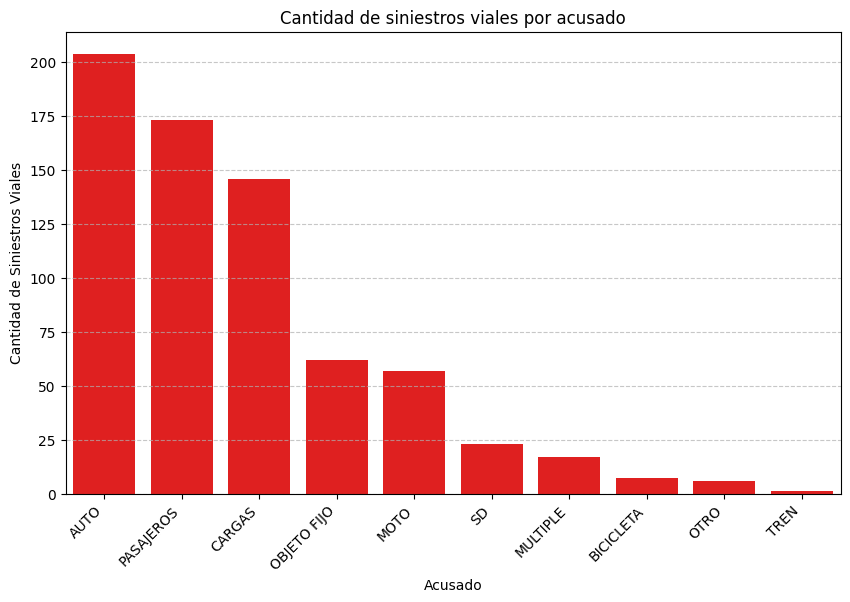

In [19]:
acusados_counts = hechos['ACUSADO'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=acusados_counts.index, y=acusados_counts.values, color='red')
plt.title('Cantidad de siniestros viales por acusado')
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Siniestros Viales')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que los autos encabezan los causantes de siniestros viales, seguidos de los pasajeros y las cargas. </p>


<p style="font-size:16px;">Si observamos detenidamente el gráfico podemos ver que los autos y las cargas son los vehículos que mayor cantidad de siniestros viales producen. Probablemente esto se deba al tamaño y el peso de los vehículos que al colisionar contra un peaton o contra un rodado de menor volúmen producen indefectiblemente resultados catastróficos que derivan en la muerte.</p>


<p style="font-size:16px;">Por otra parte, si hablamos de los pasajeros, podemos decir que inciden en los siniestros viales por su conducta particularmente. Estando dentro del vehículo pueden distraer fácilmente al conductor y contribuir de esta forma a que se produzcan los accidentes.</p>

<p style="font-size:18px;"><u>Siniestros viales por comuna</u></p>

<p style="font-size:15px;">Muestro los siestros viales por comuna</p>

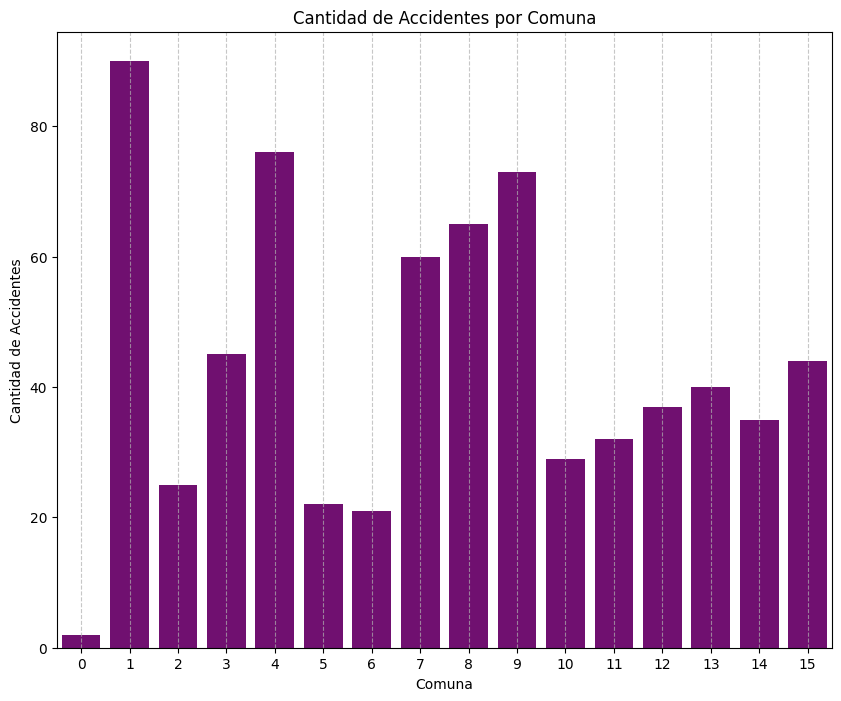

In [8]:
# Cuento la cantidad de accidentes por comuna
accidentes_por_comuna = hechos['COMUNA'].value_counts()

# Configuro el gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=accidentes_por_comuna.index, y=accidentes_por_comuna.values, color='purple')
plt.title('Cantidad de Accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Accidentes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que la comuna con mayor cantidad de accidentes es la 1, seguida de la 4 y la 9. Este dato nos sirve porque podemos ver en qué se puede estar fallando en cuanto a vías de comunicación en las distintas comunas y los arreglos necesarios que habría que hacer para evitar los siniestros. </p>

<p style="font-size:18px;"><u>Top 10 de calles y cruces con mayor cantidad de accidentes</u></p>

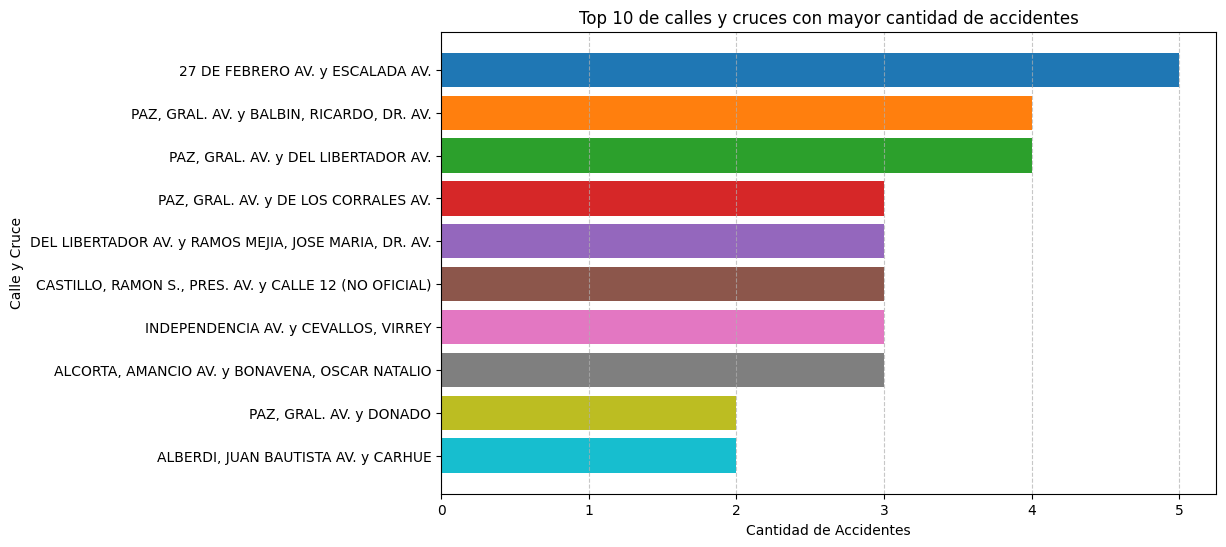

In [35]:
hechos['Calle_Cruce'] = hechos['Calle'] + ' y ' + hechos['Cruce']

accidentes_por_calle_cruce = hechos['Calle_Cruce'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
for i, (calle_cruce, count) in enumerate(accidentes_por_calle_cruce.items()):
    plt.barh(calle_cruce, count, color=plt.cm.tab10(i))  
plt.gca().invert_yaxis() 
plt.title('Top 10 de calles y cruces con mayor cantidad de accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Calle y Cruce')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



<p style="font-size:16px;">Al observar el gráfico podemos ver los puntos neurálgicos donde más cantidades de accidentes se producen, siendo el punto que une la Av 27 de Febrero con la Av Escalada el que más accidentes tiene. Este dato es muy importante porque permite al gobierno analizar por qué se producen accidentes en estos cruces y preveer la forma de evitarlos. </p>

<p style="font-size:16px;">Las propagandas que ayuden a generar conciencia en la gente, la utilización de elementos de señalización como carteles, y la colocación de semáforos y badenes pueden ser recursos que ayuden a disminuir los accidentes de tránsito. </p>

<p style="font-size:18px;"><u>Siniestros viales por tipo de calle</u></p>

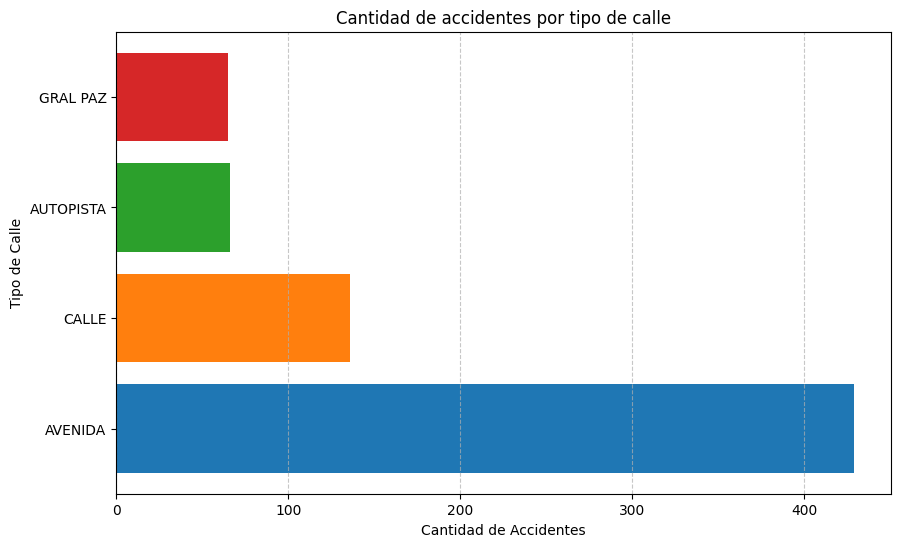

In [28]:
accidentes_por_tipo_de_calle = hechos['TIPO_DE_CALLE'].value_counts()

plt.figure(figsize=(10, 6))
for i, (tipo_calle, count) in enumerate(accidentes_por_tipo_de_calle.items()):
    plt.barh(tipo_calle, count, color=plt.cm.tab10(i))  
plt.title('Cantidad de accidentes por tipo de calle')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipo de Calle')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que la avenida es el tipo de calle que más accidentes de tránsito genera, seguido de una calle común. Este dato nos sirve para ver cómo el gobierno puede mejorar las avenidas con señalizaciones u otro tipo de recursos para disminuir la cantidad de siniestros. </p>

<p style="font-size:16px;">Vale la pena observar que hay una amplia diferencia, por ejemplo, cuando analizamos la cantidad de accidentes entre una calle común y una avenida.Tenemos que pensar que en las avenidas se puede andar a mayor velocidad que en las calles, por lo tanto, el margen de maniobra para el conductor es menor. Además, el volúmen de autos que circula por una avenida es ampliamente mayor que el que circula por una calle común y corriente, por lo tanto puede haber más probabilidad de accidentes. </p>

<p style="font-size:18px;"><u>Cantidad de accidentes por hora</u></p>

<p style="font-size:15px;">Muestro la cantidad de accidentes por hora </p>

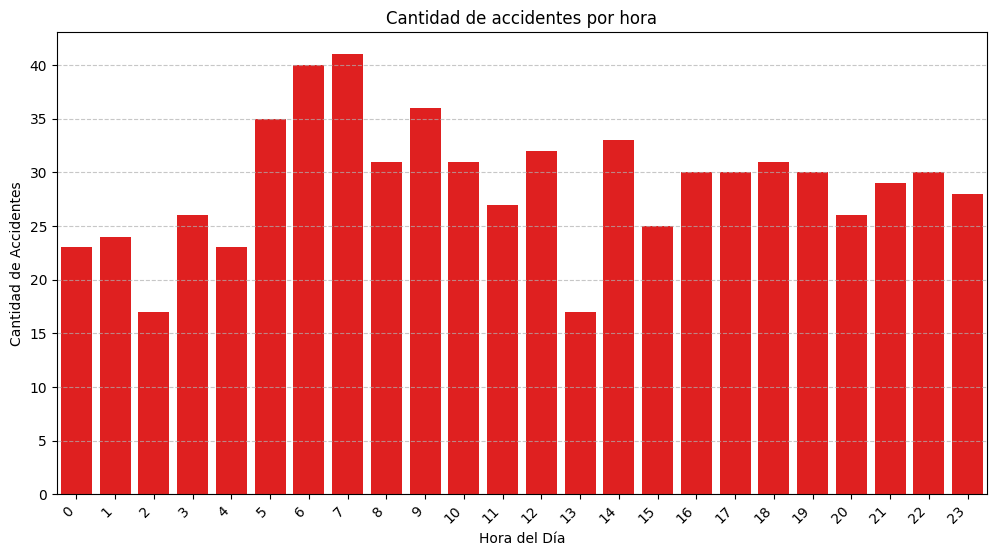

In [34]:
hechos['HH'] = pd.to_numeric(hechos['HH'], errors='coerce')

hechos = hechos.dropna(subset=['HH'])

hechos['HH'] = hechos['HH'].astype(int)

accidentes_por_hora = hechos['HH'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, color='red')
plt.title('Cantidad de accidentes por hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p style="font-size:16px;">Al observar el gráfico podemos ver que entre las 6 y 7 de la mañana es el momento donde más cantidad de accidentes de tránsito hay. Este dato es muy importante porque permite evaluar si la mayor cantidad de accidentes se producen de día o de noche y por qué. Por ejemplo, si los accidentes son de noche se puede deber a factores como la falta de visibilidad, o el consumo de alguna sustancia producto de una salida a un bar, o algún otro factor. </p>


<h3>Conclusiones finales</h3>

<p style="font-size:18px;">En base a los datos recopilados y a lo expuesto en los diferentes gráficos con sus respectivos análisis podemos llegar a las siguientes conclusiones: </p>

<ul>
  <li>De los años analizados, el 2018 fue el año con mayor cantidad de siniestros viales, mientras que el año 2020, que fue el año del confinamiento por COVID -19, fue el que menos accidentes produjo.</li>
  <br>
  <li>Los hombres son suceptibles a causar y a ser víctimas de más cantidad de siniestros viales por el simple hecho de que conducen mayor cantidad de vehículos que las mujeres. Además las mujeres utilizan mucho más las medidas preventorias de accidentes, tales como los cinturones de seguridad, que los hombres.</li>
  <br>
  <li>La franja etaria que va desde los 20 a los 39 años es la que más cantidad de víctimas por accidentes viales tiene. Esto se puede deber a que es el momento de mayor productividad de las personas y por ende, su capacidad de adquirir e utilizar vehículos es mucho mayor que cuando se acerca a la edad jubilatoria.</li>
  <br>
  <li>Los autos y los vehículos de carga son los tipos de rodado que mayor cantidad de víctimas se cobran en los siniestros viales. Esto puede deberse al volúmen de los mismos, que al colisionar con otros vehículos de menor volúmen o con los peatones desencadenan un descenlace fatal.</li>
  <br>
  <li>La avenida es el tipo de calle que más siniestros viales genera. Esto puede deberse a que en una avenida se transita más velozmente que en la calle, y además contiene mayor volúmen de autos que una calle común y corriente, por lo tanto aumenta la probabilidad de accidentes.</li>
  <br>
  <li>Entre las 6 y las 7 de la mañana es el horario donde mayor cantidad de accidentes viales se producen. Este es el horario que coincide con el cierre de mucho bares por ejemplo, lo cual puede hacer que un conductor alcoholizado produzca un accidente. Además, en períodos como otoño-invierno es un horario que todavía es de noche, por lo tanto hay menos visibilidad e incluso puede haber neblina que sea un factor que ayude a producir los accidentes de tránsito.</li>
</ul>

<h3> Fuentes citadas </h3>
Ministerio de Transporte de la Nación:         https://www.argentina.gob.ar/sites/default/files/2018/12/ansv_informe-con-perspectiva-de-genero-en-argentina-marzo-2023.pdf